# ML-Project2 Started

## Cleaning the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('housing.csv', sep='\s+',names=['crime_rate', 'zoned_land', 'industry', 'charles_dummy_var', 'nox_conc', 'rooms', 'age', 'distance', 'highways', 'property_tax', 'pt_ratio', 'black_prop', 'lower_status_popu', 'price_in_thousands'])
df.head()

,crime_rate,zoned_land,industry,charles_dummy_var,nox_conc,rooms,age,distance,highways,property_tax,pt_ratio,black_prop,lower_status_popu,price_in_thousands
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# - CRIM per capita crime rate by town 
# - ZN proportion of residential land zoned for lots over 25,000 sq.ft. 
# - INDUS proportion of non-retail business acres per town 
# - CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
# - NOX nitric oxides concentration (parts per 10 million) 
# - RM average number of rooms per dwelling 
# - AGE proportion of owner-occupied units built prior to 1940 
# - DIS weighted distances to five Boston employment centres 
# - RAD index of accessibility to radial highways 
# - TAX full-value property-tax rate per $10,000 
# - PTRATIO pupil-teacher ratio by town 
# - B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
# - LSTAT % lower status of the population 
# - MEDV Median value of owner-occupied homes in $1000's

In [5]:
# ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS: proportion of non-retail business acres per town
# CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX: nitric oxides concentration (parts per 10 million)
# RM: average number of rooms per dwelling
# AGE: proportion of owner-occupied units built prior to 1940
# DIS: weighted distances to ﬁve Boston employment centers
# RAD: index of accessibility to radial highways
# TAX: full-value property-tax rate per $10,000
# PTRATIO: pupil-teacher ratio by town 
# B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 
# LSTAT: % lower status of the population
# MEDV: Median value of owner-occupied homes in $1000s
# We can see that the input attributes have a mixture of units.

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,crime_rate,zoned_land,industry,charles_dummy_var,nox_conc,rooms,age,distance,highways,property_tax,pt_ratio,black_prop,lower_status_popu,price_in_thousands
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.size

7084

In [9]:
obj_list = []
num_list = []
for column in df.columns:
    if df[column].dtype == 'O':
        obj_list.append(column)
    else:
        num_list.append(column)
obj_list, num_list

([],
 ['crime_rate',
  'zoned_land',
  'industry',
  'charles_dummy_var',
  'nox_conc',
  'rooms',
  'age',
  'distance',
  'highways',
  'property_tax',
  'pt_ratio',
  'black_prop',
  'lower_status_popu',
  'price_in_thousands'])

### Data has no categorical columns

## Visualization

<Axes: xlabel='crime_rate', ylabel='highways'>

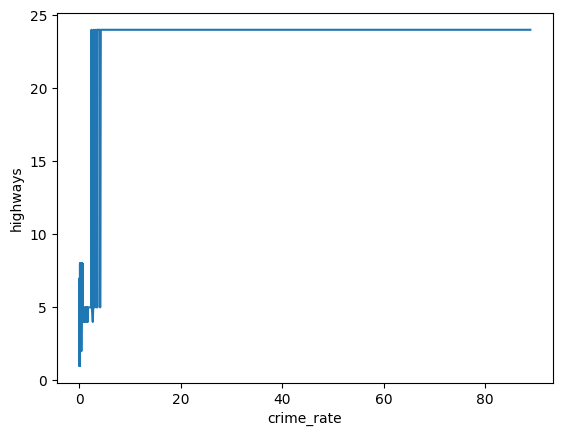

In [10]:
sns.lineplot(data = df, x = 'crime_rate', y = 'highways')

### Here we can see that:
1. The crime rate increased as the highways number increased.

In [11]:
df[df['highways'] > 23].sort_values(by='crime_rate', ascending= False).head(15)


,crime_rate,zoned_land,industry,charles_dummy_var,nox_conc,rooms,age,distance,highways,property_tax,pt_ratio,black_prop,lower_status_popu,price_in_thousands
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666.0,20.2,396.90,17.21,10.4
418,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666.0,20.2,16.45,20.62,8.8
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666.0,20.2,384.97,22.98,5.0
410,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666.0,20.2,2.60,10.11,15.0
414,45.7461,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666.0,20.2,88.27,36.98,7.0
404,41.5292,0.0,18.1,0,0.693,5.531,85.4,1.6074,24,666.0,20.2,329.46,27.38,8.5
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666.0,20.2,396.90,30.59,5.0
427,37.6619,0.0,18.1,0,0.679,6.202,78.7,1.8629,24,666.0,20.2,18.82,14.52,10.9
413,28.6558,0.0,18.1,0,0.597,5.155,100.0,1.5894,24,666.0,20.2,210.97,20.08,16.3
417,25.9406,0.0,18.1,0,0.679,5.304,89.1,1.6475,24,666.0,20.2,127.36,26.64,10.4


In [12]:
df.nunique()

crime_rate            504
zoned_land             26
industry               76
charles_dummy_var       2
nox_conc               81
rooms                 446
age                   356
distance              412
highways                9
property_tax           66
pt_ratio               46
black_prop            357
lower_status_popu     455
price_in_thousands    229
dtype: int64

<Axes: xlabel='highways', ylabel='price_in_thousands'>

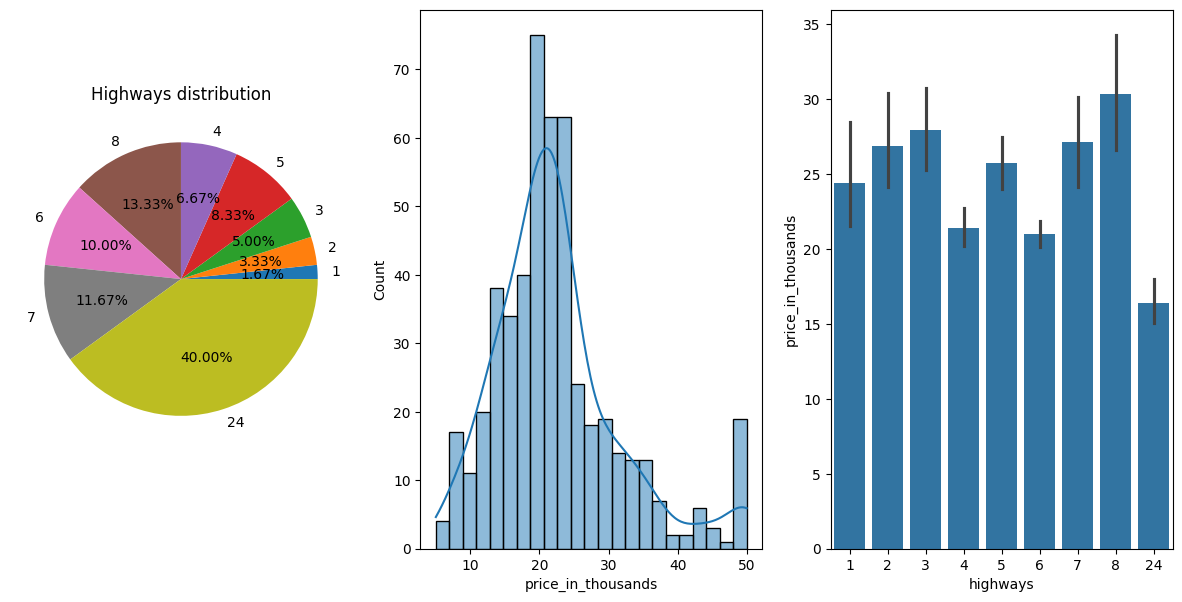

In [13]:
fig, axis = plt.subplots(1,3, figsize= (15,7))
plt.subplot(131)
plt.title('Highways distribution')
plt.pie(x = df['highways'].unique(), labels=df.highways.unique(),data=df, autopct='%1.2f%%')
plt.subplot(132)
sns.histplot(data = df, x = 'price_in_thousands', kde=True)
plt.subplot(133)
sns.barplot(data = df, x = 'highways', y = 'price_in_thousands')

### From the above graphs we can see that:
1. Highest housing is with 24 highways near it which comprises of 40%, followed by 8 highways and 7 houses
2. The price distribution is mainly concentrated on 20k, least is between 40k to 50k but it increased at 50k
3. When we compare both of them, houses with 8 highways has approximately higher cost.

<Axes: xlabel='crime_rate', ylabel='price_in_thousands'>

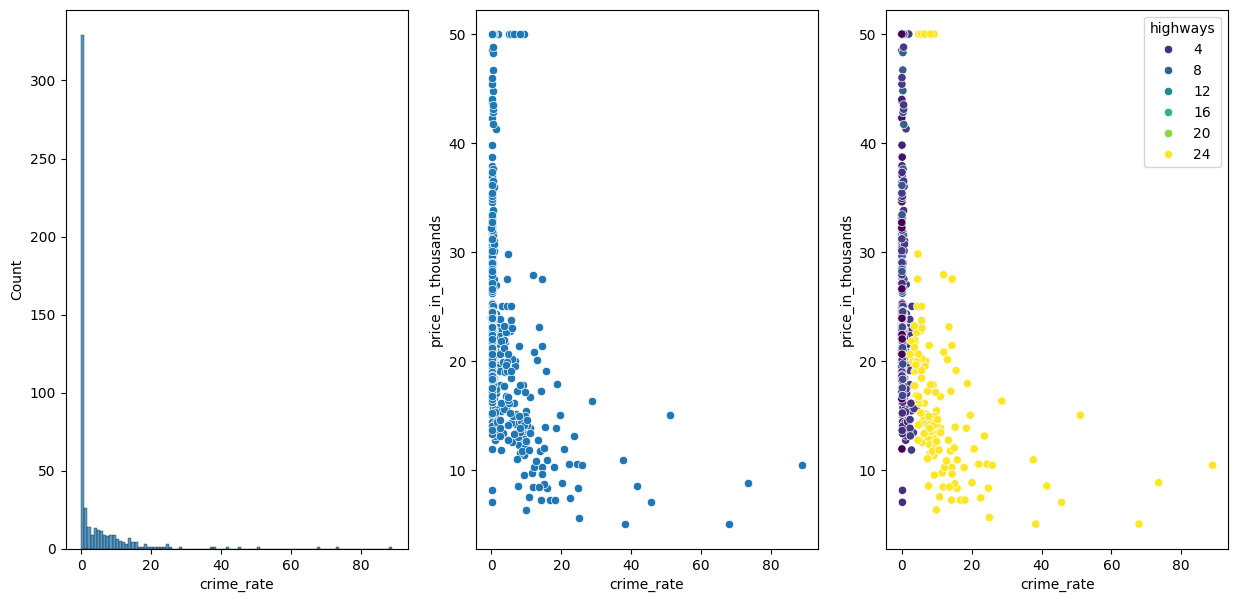

In [16]:
fig,axis = plt.subplots(1,3,figsize = (15,7))
plt.subplot(131)
sns.histplot(data=df, x = 'crime_rate')
plt.subplot(132)
sns.scatterplot(data=df, y = 'price_in_thousands', x = 'crime_rate')
plt.subplot(133)
sns.scatterplot(data=df, y = 'price_in_thousands', x = 'crime_rate', hue = 'highways', palette='viridis')

## Observations
1. Crime rate is mostly concentrated between 0 and 2
2. There is no specific pattern between crime and price here but, the price is not high when the crime rate is high.
3. The crime rate is mostly high when there are 24 highways nearby, others are pretty much the same.

<Axes: xlabel='zoned_land', ylabel='price_in_thousands'>

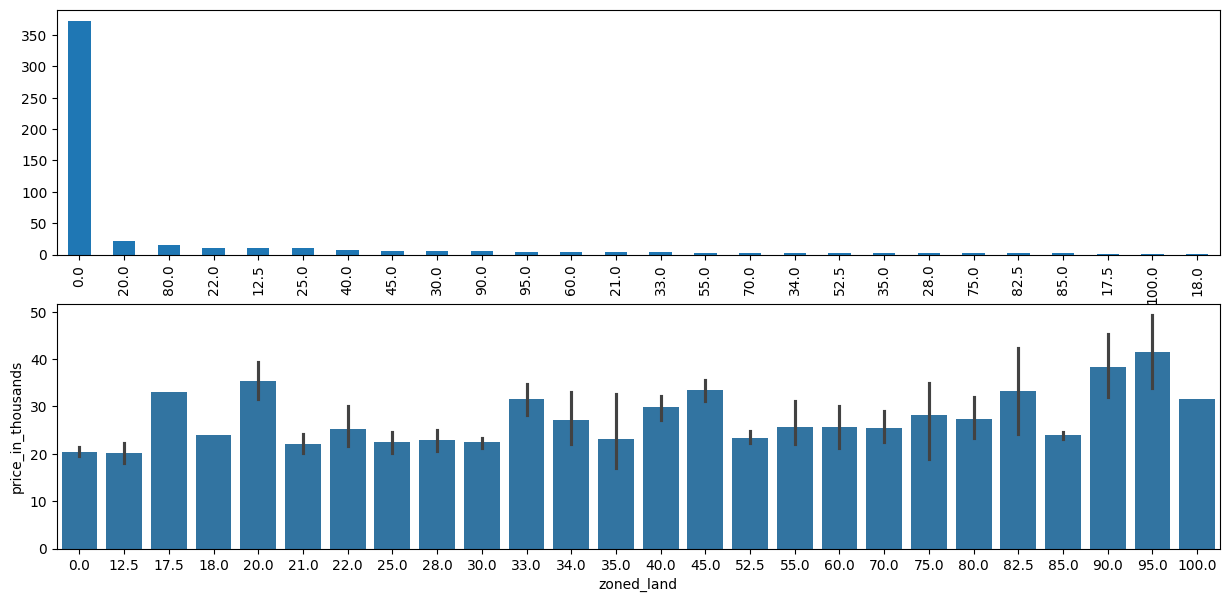

In [22]:
fig, axis = plt.subplots(2,1, figsize=(15,7))
plt.subplot(211)
df.zoned_land.value_counts().plot(kind='bar')
plt.subplot(212)
sns.barplot(data=df, x='zoned_land', y='price_in_thousands')

<Axes: xlabel='industry', ylabel='price_in_thousands'>

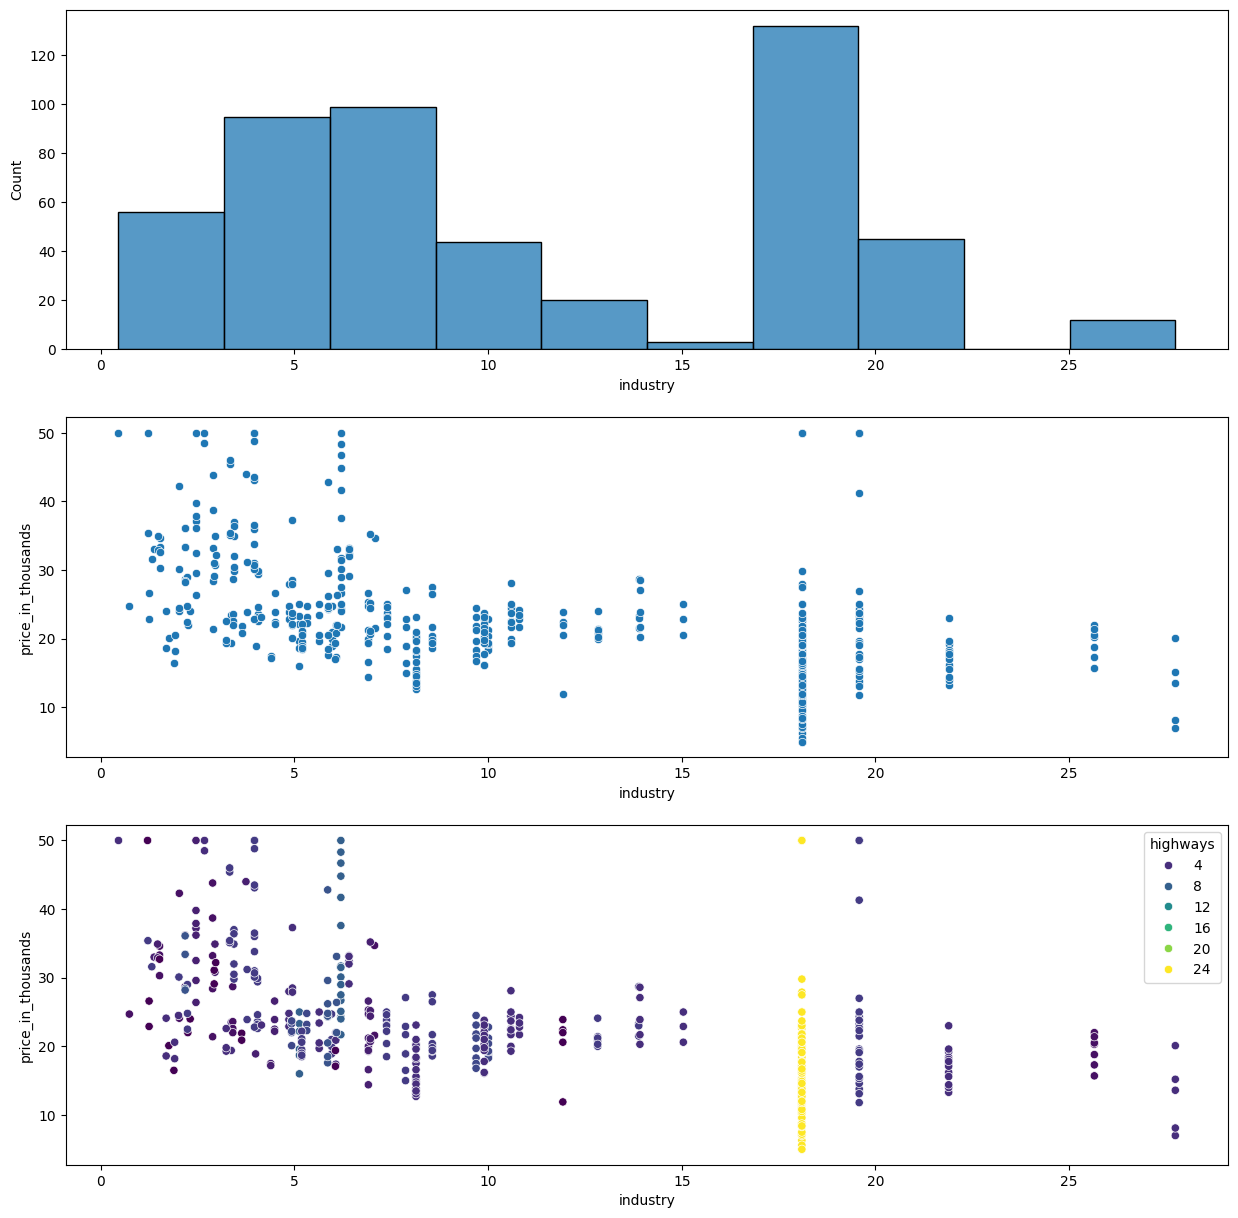

In [31]:
fig, axis = plt.subplots(3,1, figsize=(15,15))
plt.subplot(311)
sns.histplot(data=df, x='industry')
plt.subplot(312)
sns.scatterplot(data=df, x='industry', y='price_in_thousands')
plt.subplot(313)
sns.scatterplot(data=df, x='industry', y='price_in_thousands', hue='highways', palette='viridis')

## Observations
1. Mostly there are 17 to 19 industries and 3 to 8 industries
2. The maximum price is the area with lesser number of industries.
3. There are 17 industries near 24 highways and mostly there are least number of highways near 1 to 15 industries

<Axes: xlabel='charles_dummy_var', ylabel='price_in_thousands'>

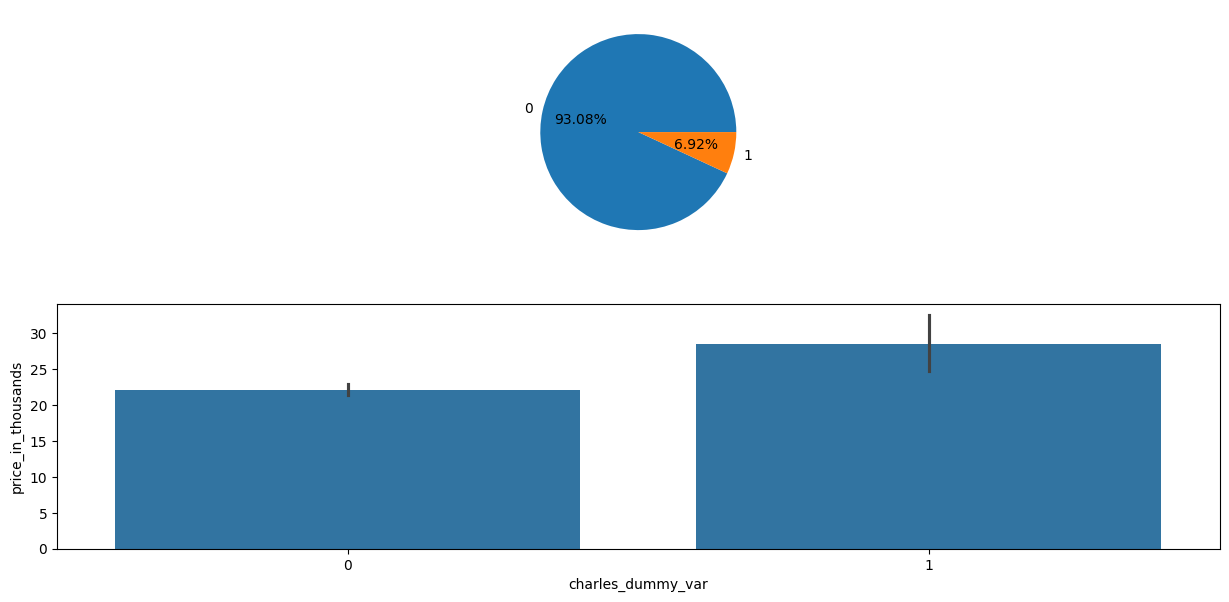

In [45]:
fig, axis = plt.subplots(2,1, figsize=(15,7))
plt.subplot(211)
plt.pie(x = df.charles_dummy_var.value_counts(), labels=df.charles_dummy_var.value_counts().index, autopct='%1.2f%%')
plt.subplot(212)
sns.barplot(data=df, x='charles_dummy_var', y='price_in_thousands')

<Axes: xlabel='nox_conc', ylabel='price_in_thousands'>

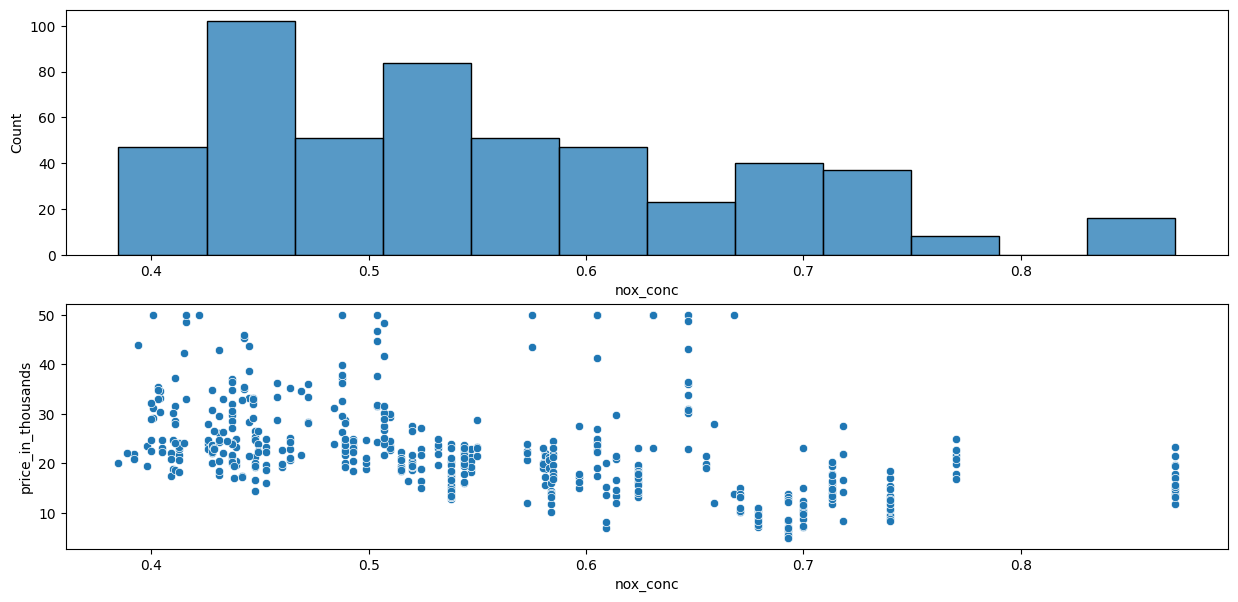

In [47]:
fig, axis = plt.subplots(2,1, figsize=(15,7))
plt.subplot(211)
sns.histplot(data=df, x='nox_conc')
plt.subplot(212)
sns.scatterplot(data=df, x='nox_conc', y='price_in_thousands')